# 0 Imports

In [1]:
import dtale
import pickle
import datetime

import numpy            as np
import pandas           as pd
import seaborn          as sns
import plotly.express   as px

from matplotlib import pyplot as plt

from IPython.display        import Image
from IPython.core.display   import HTML

In [2]:
# Supressão da notação científica.
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)

In [41]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18,8]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width: 100% !important;} </style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.1 Funções Suporte

## 0.2 Load Data

In [4]:
df = pickle.load(open("../data/interim/1_0_descricao_dados.pkl","rb"))
df.sample()

,subscription_name,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost
1029,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2024-02-13,c089a13a-9dd0-44b5-aa9e-44a77bbd6788,Bandwidth,All,BR South,Standard Data Transfer Out,3.391811,0.613919


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subscription_name  4728 non-null   object        
 1   subscription_guid  4728 non-null   object        
 2   date               4728 non-null   datetime64[ns]
 3   resource_guid      4728 non-null   object        
 4   service_name       4728 non-null   object        
 5   service_type       4728 non-null   object        
 6   service_region     4728 non-null   object        
 7   service_resource   4728 non-null   object        
 8   quantity           4728 non-null   float64       
 9   cost               4728 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 369.5+ KB


# 2.0 EDA pré Feature Engineering

## 2.1 DTail

In [ ]:
# Assigning a reference to a running D-Tale process
d = dtale.show(df)

# Accessing data associated with D-Tale process
tmp = d.data.copy()
tmp['d'] = 4

# Altering data associated with D-Tale process
# FYI: this will clear any front-end settings you have at the time for this process (filter, sorts, formatting)
d.data = tmp

# Shutting down D-Tale process
#d.kill()

# using Python's `webbrowser` package it will try and open your server's default browser to this process
d.open_browser()

# There is also some helpful metadata about the process
d._data_id  # the process's data identifier
d._url  # the url to access the process

d2 = dtale.get_instance(d._data_id)  # returns a new reference to the instance running at that data_id

dtale.instances()  # prints a list of all ids & urls of running D-Tale sessions

In [19]:
d.kill()

2024-09-18 18:23:34,216 - INFO     - Shutdown complete


## Novas colunas date

In [91]:
# year
df['year'] = df['date'].dt.year
# month
df['month'] = df['date'].dt.month
# day
df['day'] = df['date'].dt.day
# week of year
df['week_of_year'] = df['date'].dt.isocalendar().week
# year week
df['year_week'] = df['date'].dt.strftime('%Y-%W')
# year month
df['year_month'] = df['date'].dt.strftime('%Y-%m')

## Outros Gráficos

In [6]:
df.columns

Index(['subscription_name', 'subscription_guid', 'date', 'resource_guid',
       'service_name', 'service_type', 'service_region', 'service_resource',
       'quantity', 'cost'],
      dtype='object')

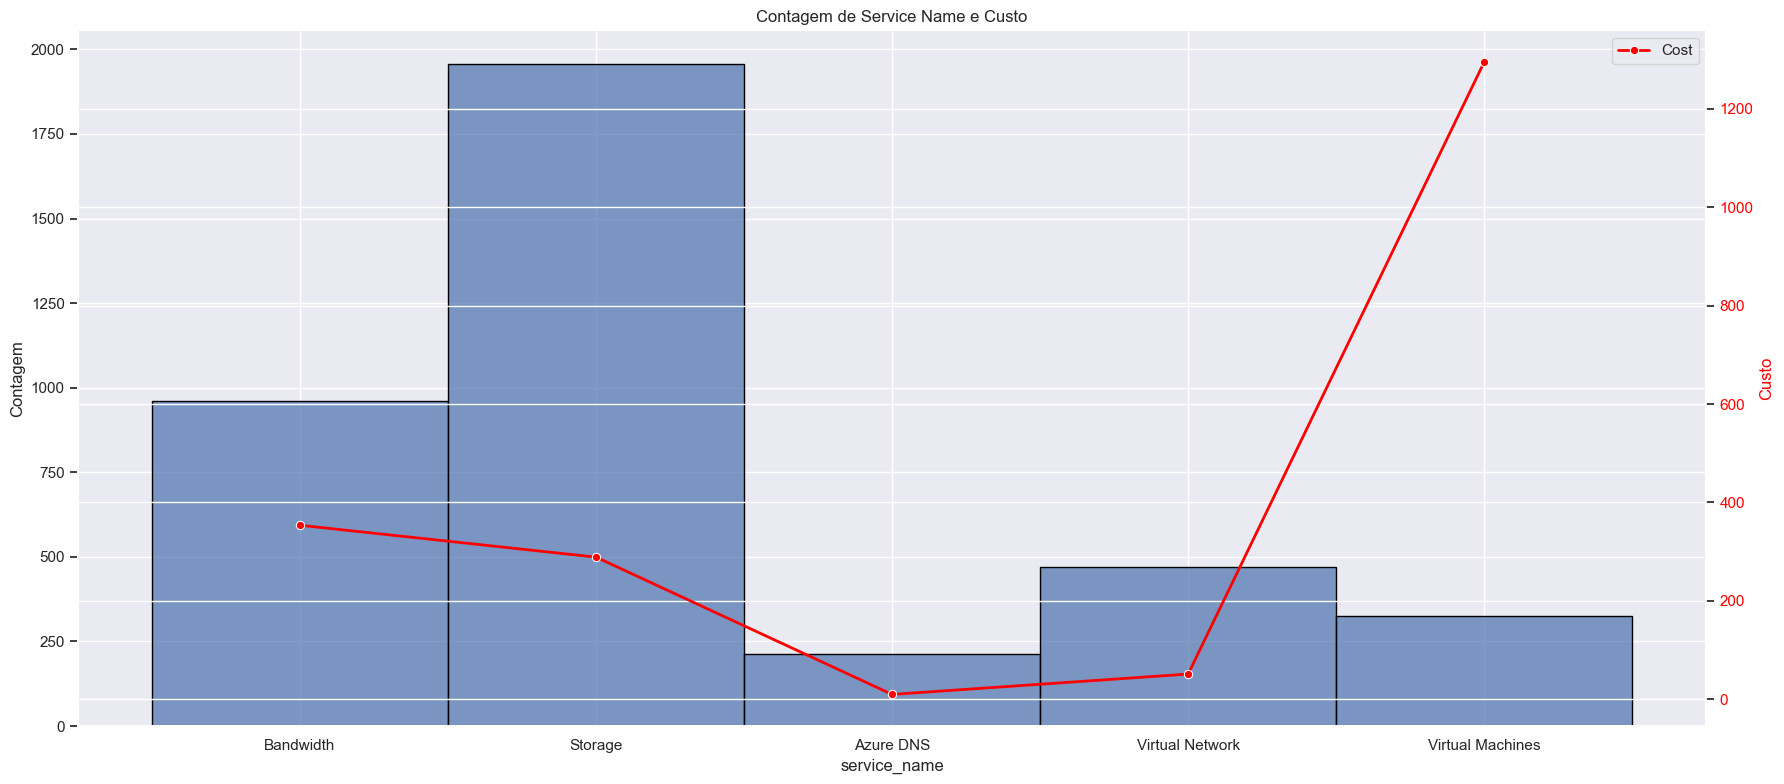

In [64]:
df_line = df.loc[df['service_name'].isin(['Bandwidth', 'Storage', 'Virtual Network', 'Virtual Machines', 'Azure DNS']),\
                ['service_name','cost']]\
                .groupby('service_name').sum().reset_index()

df_hist = df.loc[df['service_name'].isin(['Bandwidth', 'Storage', 'Virtual Network', 'Virtual Machines', 'Azure DNS']),['service_name']]

# Criar um eixo principal para o histograma
ax1 = plt.gca()

# Histograma mostrando a contagem de 'service_name'
sns.histplot(
    data=df_hist,
    x='service_name',
    ax=ax1,
    stat='count',
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulo ao eixo y para o histograma
ax1.set_ylabel('Contagem')
ax1.tick_params(axis='y')

# Criar um segundo eixo y para a linha do custo
ax2 = ax1.twinx()

# Plotar a linha do custo
sns.lineplot(
    data=df_line,
    x='service_name',
    y='cost',
    ax=ax2,
    marker='o',
    color = 'red',
    linewidth=2,
    label='Cost'
)

# Adicionar rótulo ao eixo y para o custo
ax2.set_ylabel('Custo', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Melhorar a legibilidade
plt.title('Contagem de Service Name e Custo')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

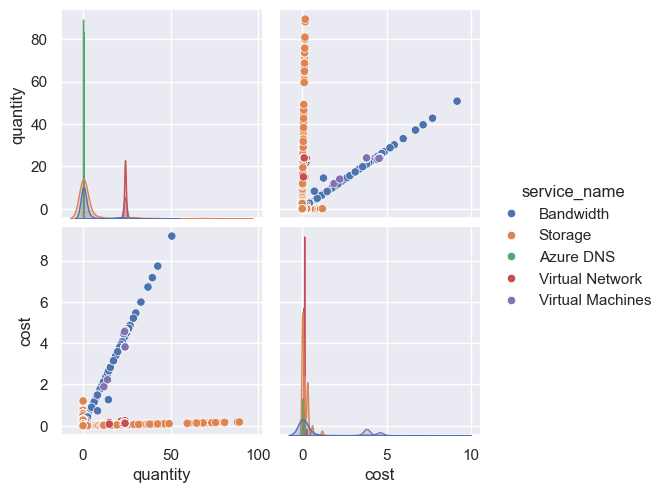

In [38]:
df_pairplot = df.loc[df['service_name'].isin(['Bandwidth','Storage','Virtual Network','Virtual Machines','Azure DNS']),:]
sns.pairplot(df_pairplot, hue="service_name")

In [92]:
df['year_week'].unique()

array(['2024-02', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
       '2024-09', '2024-10', '2024-11', '2024-12', '2024-13', '2024-14',
       '2024-15', '2024-16', '2024-17', '2024-18', '2024-19', '2024-20',
       '2024-21', '2024-22', '2024-23', '2024-24', '2024-25', '2024-26',
       '2024-27', '2024-28', '2024-29', '2024-30', '2024-31', '2024-32',
       '2024-33', '2024-34', '2024-36', '2024-37', '2024-38', '2023-37',
       '2023-38', '2023-39', '2023-40', '2023-41', '2023-42', '2023-43',
       '2023-44', '2023-45', '2023-46', '2023-47', '2023-48', '2023-49',
       '2023-50', '2023-51', '2023-52', '2024-35', '2024-01', '2024-03'],
      dtype=object)

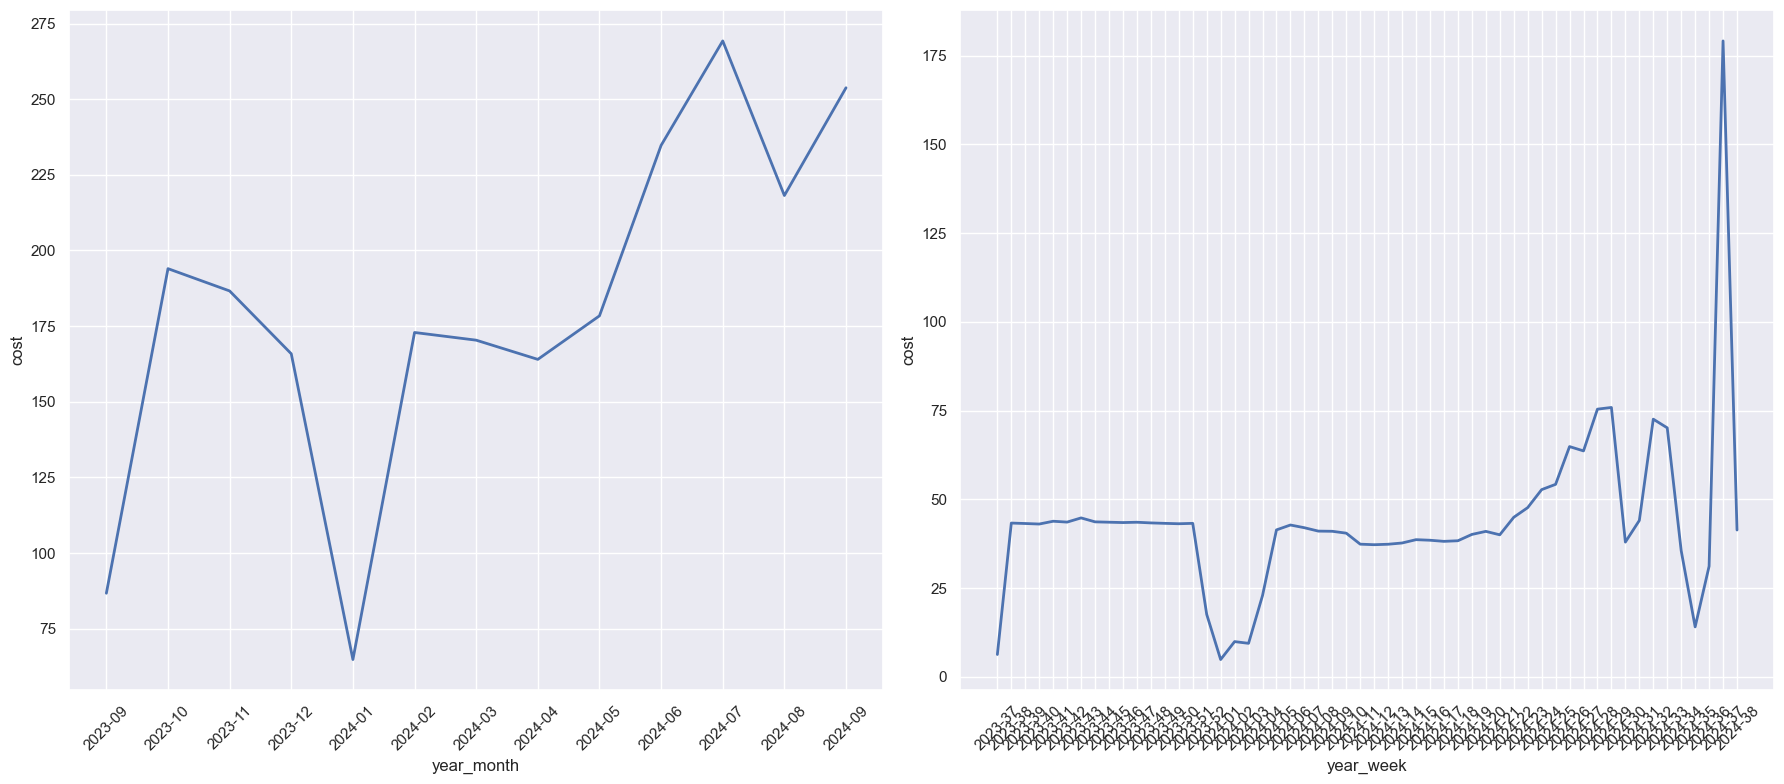

In [94]:
plt.subplot(1,2,1)
df_line_2 = df.loc[:,['cost','year_month']].groupby('year_month').sum().reset_index()
sns.lineplot(
    data=df_line_2,
    x='year_month',
    y='cost',
    linewidth=2,
)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df_line_3 = df.loc[:,['cost','year_week']].groupby('year_week').sum().reset_index()
sns.lineplot(
    data=df_line_3,
    x='year_week',
    y='cost',
    linewidth=2,
)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2.6 Export PKL

In [ ]:
pickle.dump(df,open("../data/interim/2_0_eda_pre_fe.pkl","wb"))